<a href="https://colab.research.google.com/github/HuyenNguyenHelen/Huyen_INFO5731_Spring2020/blob/master/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
# Topic Modeling  with LDA Gensim
# Import necessary packages
import pandas as pd
import csv
from nltk.tokenize import RegexpTokenizer
!pip install stop-words
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt

# Open dataset
with open('/content/Huyen_labeled_review_sentiments.csv', 'r', encoding = 'utf-8') as file:
  df = pd.read_csv (file)

# do pre-prossessing
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['review']=df['review'].str.replace('[^\w\s]','')
df['review']=df['review'].str.lower()
df

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 18.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=91753540b799a352c98b41b2b71b63f00219bd64a48b9db4ae5eaf517817789b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=2ad01fccfd28bfb6d3cd9395d41b2efacc1e7ce26dff1261b50a7fc386626315
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


,docID,review,defined sentiment
0,doc1,everi movi come truli make impact joaquin perf...,positive
1,doc2,movi felt alon isol truli relat understand mot...,positive
2,doc3,truli masterpiec best hollywood film one best ...,positive
3,doc4,time movi anticip like end fall short way shor...,positive
4,doc5,joaquin phoenix give tour de forc perform fear...,positive
...,...,...,...
104,doc105,saw joker last night highli disappoint possibl...,negative
105,doc106,movi rip movi doesnt redeem valu even impli br...,negative
106,doc107,perform joaquin phoenix asid overal movi way o...,negative
107,doc108,dont fall movi total overhyp border bore irrit...,negative


In [0]:

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
stop_plus = ['joker', 'joaquin']

# Create PorterStemmer
p_stemmer = PorterStemmer()

# create list of documents
review_set = [review for review in df['review']]

# list for tokenized documents 
texts = []
# loop through document list
for review in review_set:
    # clean and tokenize document string
    tokens = tokenizer.tokenize(review)
    # remove stop words from tokens
    stopped_tokens = [review for review in tokens if not review in en_stop + stop_plus]
    texts.append( stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=60)






Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [0]:
# print topics
for topic in ldamodel.print_topics(num_topics=10, num_words=8):
    print (topic )


(0, '0.016*"film" + 0.012*"thing" + 0.012*"like" + 0.012*"make" + 0.010*"movi" + 0.007*"feel" + 0.006*"life" + 0.006*"person"')
(1, '0.022*"film" + 0.021*"movi" + 0.011*"peopl" + 0.010*"stori" + 0.009*"like" + 0.008*"driver" + 0.008*"taxi" + 0.008*"act"')
(2, '0.018*"movi" + 0.011*"film" + 0.009*"ill" + 0.009*"mental" + 0.007*"one" + 0.007*"charact" + 0.006*"im" + 0.006*"watch"')
(3, '0.018*"film" + 0.017*"movi" + 0.010*"charact" + 0.008*"arthur" + 0.008*"way" + 0.007*"dont" + 0.007*"great" + 0.007*"like"')
(4, '0.017*"movi" + 0.012*"phoenix" + 0.011*"societi" + 0.011*"mr" + 0.008*"get" + 0.008*"peopl" + 0.008*"feel" + 0.007*"want"')
(5, '0.050*"movi" + 0.011*"charact" + 0.007*"think" + 0.007*"get" + 0.007*"like" + 0.007*"see" + 0.007*"stori" + 0.007*"mental"')
(6, '0.037*"movi" + 0.009*"film" + 0.008*"see" + 0.007*"version" + 0.007*"made" + 0.007*"peopl" + 0.007*"phoenix" + 0.006*"heath"')
(7, '0.027*"movi" + 0.013*"phoenix" + 0.013*"film" + 0.009*"charact" + 0.008*"stori" + 0.008*"ex

In [0]:
# Compute Coherence Score to judge how good the model performed
coherence_ldamodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_ldamodel.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2714575492025456


In [0]:
# Visualize the first work
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.070529 -0.008685       1        1  19.897047
6      0.019713  0.003489       2        1  13.125597
3     -0.072270  0.009106       3        1  12.858401
5     -0.066929 -0.030589       4        1  12.732093
9      0.010360  0.048497       5        1   9.844308
8     -0.028759  0.053380       6        1   9.645985
2      0.046859 -0.130048       7        1   6.563518
4     -0.033633  0.033266       8        1   6.336174
1      0.124565  0.086216       9        1   5.378235
0      0.070622 -0.064633      10        1   3.618642, topic_info=       Term        Freq       Total Category  logprob  loglift
87     film   85.000000   85.000000  Default  30.0000  30.0000
608   thing   19.000000   19.000000  Default  29.0000  29.0000
53     like   43.000000   43.000000  Default  28.0000  28.0000
57    peopl   36.000000   36.000000  Default  27.0000  27.0000
21     movi  219.000000  219.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
213   stori    1.199217   41.710148  Topic10  -5.4685  -0.2300
411  batman    1.199216   18.864647  Topic10  -5.4685   0.5634
228   point    1.199215   15.536844  Topic10  -5.4685   0.7575
127     end    1.199215   16.973305  Topic10  -5.4685   0.6691
550  actual    1.199213   11.558521  Topic10  -5.4686   1.0533

[885 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1295      8  0.692858  1010oscar
1009      8  0.692858    1010the
1261      2  0.636069        12i
432       2  0.752473        abl
432       6  0.250824        abl
...     ...       ...        ...
410       5  0.131981        yet
410       7  0.131981        yet
410      10  0.131981        yet
1443      1  0.890174       youd
730      10  0.528325       youv

[1754 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 4, 6, 10, 9, 3, 5, 2, 1])

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [0]:
#import library and package
import pandas as pd
!pip install stop-words
import seaborn as sns
import matplotlib.pyplot as plt
from stop_words import get_stop_words
stop_words = get_stop_words('en')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


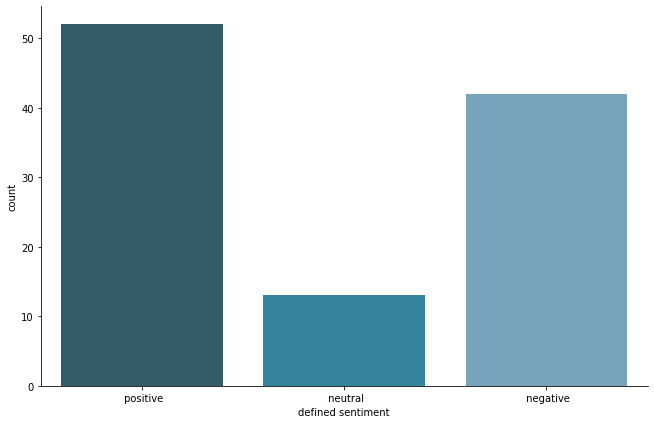

In [186]:
# PREPARE CORPUS
# Open dataset
with open('/content/Huyen_labeled_review_sentiments.csv', 'r', encoding = 'utf-8') as file:
  df = pd.read_csv (file)

# Visualize distributions of anotated sentiments from DS
sns.factorplot(x="defined sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();







In [0]:
# do pre-prossessing
filtering = ['arthur','movi', 'fleck','heath', 'ledger', 'joaquin', 'phoenix', 'joker', 'phoenix ', 'todd', 'phillip'] # list of most common words in dataset 
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))  # remove digits 
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in filtering and stop_words))    # remove stopwords and common words
df['review']=df['review'].str.replace('[^\w\s]','') # remove punctuations
df['review']=df['review'].str.lower()               # lowercase



In [0]:
# Represent documents by Countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word',lowercase = False, )
features = vectorizer.fit_transform(df['review'])
features_nd = features.toarray() 


In [197]:
# Divide dataset into two corpora for training and testing (80% and 20% respectively)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test  = train_test_split( features_nd, df['defined sentiment'],train_size=0.80)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  newdoc = "%s: %s" % (newdoc, self.extra)


In [0]:
# Model 1: apply Sklearn - logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)
log_model = log_model.fit(X=X_train, y=y_train)


In [199]:
# applied model to label test data
y_pred_LR = log_model.predict(X_test)
print('predicted labels:', [y for y in y_pred_LR])
print('anotated labels:', [y for y in y_test])

predicted labels: [' positive', ' negative', ' negative', ' positive', ' negative', ' positive', ' negative', ' positive', ' negative', ' positive', ' negative', ' negative', ' positive', ' positive', ' negative', ' positive', ' positive', ' negative', ' negative', ' negative', ' positive', ' positive']
anotated labels: [' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' positive', ' positive', ' positive', ' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' negative', ' negative', ' neutral', ' neutral', ' positive', ' positive', ' positive']


In [200]:
# Calculate performance of Logistic Regression model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro') *100
precision = precision_score(y_test, y_pred, average='macro') *100
recall = recall_score (y_test, y_pred, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 32.38095238095238
accuracy score: 45.45454545454545
precision score: 31.515151515151512
recall score: 33.33333333333333


In [201]:
# Model 2: apply MultinomialNB  model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

#Use model to label test data 
y_pred_NB = nb.predict(X_test)
print('predicted labels:', [y for y in y_pred_NB])
print('anotated labels:', [y for y in y_test])

predicted labels: [' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' positive', ' positive', ' negative', ' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' positive', ' negative', ' positive', ' positive']
anotated labels: [' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' positive', ' positive', ' positive', ' positive', ' negative', ' negative', ' positive', ' negative', ' negative', ' negative', ' negative', ' neutral', ' neutral', ' positive', ' positive', ' positive']


In [202]:
# calculate performance of  MultinomialNB model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred_NB) * 100
f1 = f1_score(y_test, y_pred_NB, average='macro') *100
precision = precision_score(y_test, y_pred_NB, average='macro') *100
recall = recall_score (y_test, y_pred_NB, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 53.939393939393945
accuracy score: 77.27272727272727
precision score: 51.66666666666667
recall score: 56.66666666666668


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word',lowercase = False, )
features = vectorizer.fit_transform(df['review'])
features_nd = features.toarray() 


Conclusion: 
The features were selected by using Bag-to-word, then divided into 2 copora for training (80%) and testing (20%), and then trained on two models: LogisticRegression and MultimialNB. From the results of the two models above, we see that LogisticRegression completely outperformed MultinomialNB model with over 90.3% and 46% on F1-score respectively.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
# Write your code here